# TP - Nettoyage textuel et analyse exploratoire

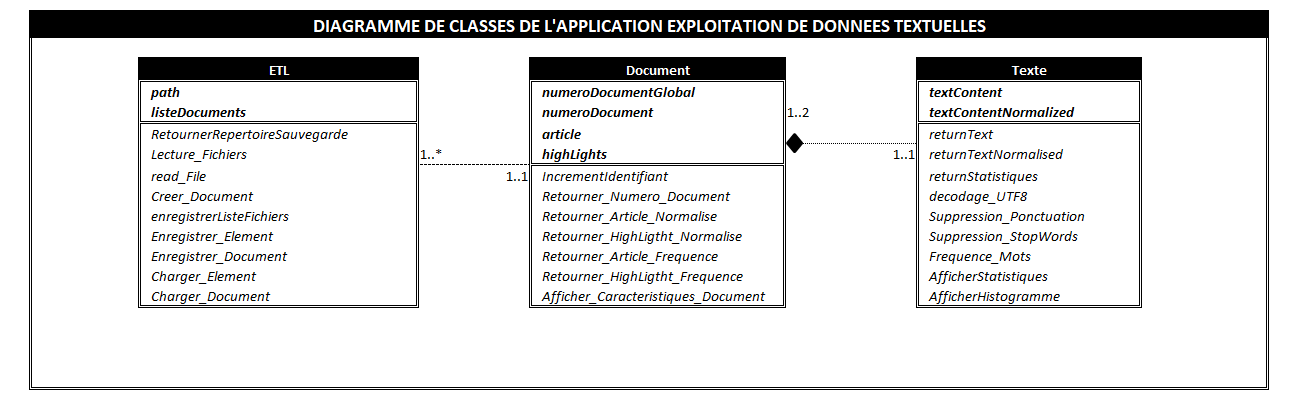

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "DiagrammeClasses.png")

## Classe ETL

In [11]:
import pickle
import os
#from Document import Document

class ETL:

    def __init__(self,path):
        self.path = path
        os.chdir(path)
        
        self.listeDocuments = []
        
    def retournerRepertoireSauvegarde(self):
        repertoireBackUp = self.path 
        return repertoireBackUp

    def Lecture_Fichiers(self):
        listeFichiers = os.listdir(self.path)
        
        for fichier in listeFichiers:
            self.Creer_Document(fichier)
    
    def read_File(self,nameFile):
        
        Content = {}
        
        with open(nameFile,"rb") as myFile:
            myString = str(myFile.read())
            Content['Texte'] = myString[:int(myString.find('@highlight'))]
            Content['HighLight'] = myString[int(myString.find('@highlight')):]
            
        return Content

    def Creer_Document(self,nomFichier):
        fichier = self.read_File(nomFichier)
        
        document = Document(
                        fichier['Texte'],
                        fichier['HighLight'])
        
        self.listeDocuments.append(document)

    def enregistrerListeFichiers(self):
        for document in self.listeDocuments:
            self.Enregistrer_Document(
                                document.Retourner_Numero_Document()) 

    def Enregistrer_Element(self,numeroDocument,contenu,suffixe):
        os.chdir(self.retournerRepertoireSauvegarde())
        
        nameFile = "Document_" + str(numeroDocument) + suffixe
        
        with open(nameFile,"wb") as myFichier:
            monPickler = pickle.Pickler(myFichier)
            monPickler.dump(contenu)

    def Enregistrer_Document(self,numeroDocument):       
        self.Enregistrer_Element(
                            numeroDocument,
                            self.listeDocuments[numeroDocument-1].Retourner_Article_Normalise(),
                            '_Article')
        
        self.Enregistrer_Element(
                            numeroDocument,
                            self.listeDocuments[numeroDocument-1].Retourner_HighLigtht_Normalise(),
                            '_HighLights')

    def Charger_Element(self,numeroDocument,suffixe):
        os.chdir(self.retournerRepertoireSauvegarde())
        
        nameFile = "Document_" + str(numeroDocument) + suffixe
        
        with open(nameFile,"rb") as myFichiers:
            monDe_Pickler = pickle.Unpickler(myFichiers)
            return  monDe_Pickler.load()

    def Charger_Document(self,numeroDocument):
        print('------------------------------')
        print('ARTICLE N° {} '.format(numeroDocument))
        print('------------------------------')
        print(
                self.Charger_Element(
                                    numeroDocument,
                                    '_Article'))
        
        print('------------------------------')
        print('HIGHLIGHTS N° {} '.format(numeroDocument))
        print('------------------------------')
        print(
                self.Charger_Element(
                                    numeroDocument,
                                    '_HighLights'))                



## Classe Document

In [5]:
#from Texte import Texte

class Document:

    numeroDocumentGlobal = 0
    
    @classmethod
    def IncrementIdentifiant(self):
        self.numeroDocumentGlobal += 1    
    
    def __init__(self, textArticle, textHighLights):
        self.IncrementIdentifiant()
        self.numeroDocument = self.numeroDocumentGlobal
        
        self.article = Texte(textArticle)        
        self.highLights = Texte(textHighLights)
        
        self.Afficher_Caracteristiques_Document()
        
    def Retourner_Numero_Document(self):
        return self.numeroDocument
   
    def Retourner_Article_Normalise(self):
        return self.article.returnTextNormalised()
        
    def Retourner_HighLigtht_Normalise(self):
        return self.highLights.returnTextNormalised()

    def Retourner_Article_Frequence(self):
        return self.article.returnStatistiques()
        
    def Retourner_HighLigtht_Frequence(self):
        return self.highLights.returnStatistiques()

    def Afficher_Caracteristiques_Document(self):
        print('--------------------------------------')
        print('Caractéristiques du document {}'.format(self.Retourner_Numero_Document()))
        print('--------------------------------------')
        print('HIGHLIGHTS du document {}'.format(self.Retourner_Numero_Document()))
        self.highLights.AfficherStatistiques()               
        print('ARTICLES du document {}'.format(self.Retourner_Numero_Document()))
        print('--------------------------------------')
        self.article.AfficherHistogramme()



## Classe Texte

In [4]:
import nltk
import pandas as pd
from operator import itemgetter

class Texte:
    
    def __init__(self,stringData):
        self.textContent = stringData
        
        self.textContentNormalized = self.Suppression_StopWords(
                                        self.Suppression_Ponctuation(
                                                    self.decodage_UTF8(
                                                            self.returnText())))

    def returnText(self):
        return self.textContent

    def returnTextNormalised(self):
                
        return self.textContentNormalized
    
    def returnStatistiques(self):
        self.Frequence_Mots()
        
        return self.statsMots
        
    def decodage_UTF8(self,text):
        by = bytes(text,'utf-8')
        textDecode = by.decode('utf-8').lower()
        
        return textDecode

    def Suppression_Ponctuation(self,text):
        tokenizer = nltk.RegexpTokenizer(r'\w+')
        tokenisation = tokenizer.tokenize(text)
        
        return tokenisation        
        
    def Suppression_StopWords(self,text):
        texteSansStopWords = []
        nltk.download('stopwords')
        
        listeStopWord = nltk.corpus.stopwords.words('english')
        listeStopWord.append('â')
        listeStopWord.append('n')
        listeStopWord.append('xc2')
        listeStopWord.append('xc3')
        listeStopWord.append('000')
        
        texteSansStopWords += [word for word in text if not word in listeStopWord]
        
        return texteSansStopWords
    
    def Frequence_Mots(self):
        stats = nltk.FreqDist(self.textContentNormalized)
        self.NombreMots = len(self.textContentNormalized)
        self.NombreMotsUniques = len(stats)
        self.ListeMotsTriee = sorted(stats.items(),key=itemgetter(1),reverse=True)
        self.statsMots = stats
        
    def AfficherStatistiques(self):
        self.Frequence_Mots()
        
        print('--------------------------------------')
        print('Le texte comporte {} mot(s) '.format(self.NombreMots))
        print('--------------------------------------')
        print('Le texte comporte {} mot(s) unique(s) '.format(self.NombreMotsUniques))
        print('--------------------------------------')
        
        for occurence in self.ListeMotsTriee:
            print('Le mot {} a {} occurrence(s)'.format(occurence[0],occurence[1]))
        print('--------------------------------------')

    def AfficherHistogramme(self):
        donnees = pd.Series(self.returnStatistiques())
        
        donneesTop = donnees.nlargest(20)
        donneesTrieesTop = donneesTop.sort_values(ascending=True)
        
        donneesTrieesTop.plot.barh(color="#318CE7",title="Distribution des 20 occurrences de mots les plus fréquentes")


## Test de la normalisation de fichiers

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--------------------------------------
Caractéristiques du document 19
--------------------------------------
HIGHLIGHTS du document 19
--------------------------------------
Le texte comporte 50 mot(s) 
--------------------------------------
Le texte comporte 46 mot(s) unique(s) 
--------------------------------------
Le mot highlight a 4 occurrence(s)
Le mot nhe a 2 occurrence(s)
Le mot nnicholas a 1 occurrence(s)
Le mot levene a 1 occurrence(s)
Le mot must a 1 occurrence(s)
Le mot pay a 1 occurrence(s)
Le mot nominal a 1 occurrence(s)
Le mot sum a 1 occurrence(s)
Le mot bankrupt a 1 occurrence(s)
Le mot used a 1 occurrence(s)
Le mot money a 1 occurrence(s)
Le mot priva

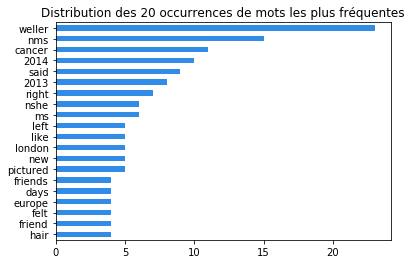

In [13]:
imp = ETL("E:\\Data\\RawData\\Exploit_data_texte\\Test")

imp.Lecture_Fichiers()


## Test de l'enregistrement de documents

In [14]:
imp.enregistrerListeFichiers()

## Test du chargement du texte de documents

In [15]:
imp.Charger_Document(2)

------------------------------
ARTICLE N° 2 
------------------------------
['b', 'nhelen', 'pow', 'npublished', 'n09', '16', 'est', '29', 'may', '2013', 'nupdated', 'n10', '51', 'est', '29', 'may', '2013', 'nmiami', 'heat', 'superstar', 'lebron', 'james', 'gave', 'touching', 'tribute', 'one', 'biggest', 'fans', 'last', 'night', 'wearing', 'name', 'sneakers', 'hours', 'lost', 'grueling', 'six', 'year', 'battle', 'cancer', 'nbella', 'rodriguez', 'torres', '10', 'loved', 'nothing', 'watching', 'heat', 'play', 'basketball', 'family', 'passed', 'away', 'yesterday', 'fighting', 'disease', 'half', 'young', 'life', 'nbella', 'diagnosed', 'aggressive', 'form', 'cancer', 'age', 'four', 'astounded', 'doctors', 'recovered', 'illness', 'something', 'parents', 'deemed', 'miracle', 'nbut', 'last', 'year', 'tumors', 'returned', 'despite', 'putting', 'another', 'fierce', 'fight', 'condition', 'deteriorated', 'slipped', 'away', 'peacefully', 'surrounded', 'family', 'friends', 'nscroll', 'video', 'nbrav